## Image Slicing for Slider Puzzle
I have a 1080 x 1080 image that I want to slice into 9 pieces for a slider puzzle. I want to save the slices as separate images in a folder called "slices". The slices will be named as "slice_1.png", "slice_2.png", and so on. The slices folder will be saved in the same directory as the original image.

In [1]:
import os


# Define the root folder and the destination folder
ROOT_DIR = ""
SRC_DIR = os.path.join(ROOT_DIR, "req_images")
DEST_DIR = os.path.join(SRC_DIR, "slices")
os.makedirs(DEST_DIR, exist_ok=True) # create destination dir if doesn't exist

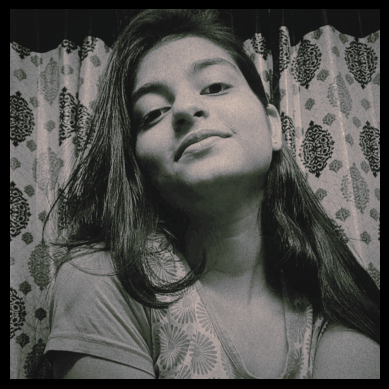

In [2]:
import cv2
from matplotlib import axis
import matplotlib.pyplot as plt
%matplotlib inline

# Read image
imgPath = os.path.join(SRC_DIR, 'Slider_Puzzle_Sexy_Pic_Edited.png')
img = cv2.imread(imgPath)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot image
plt.imshow(imgRGB)
plt.axis("off")
plt.show()

In [3]:
# Print img
img

array([[[ 22,  23,  21],
        [ 22,  23,  21],
        [ 22,  23,  21],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       [[ 22,  23,  21],
        [ 22,  23,  21],
        [ 22,  23,  21],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       [[ 22,  23,  21],
        [ 22,  23,  21],
        [ 22,  23,  21],
        ...,
        [ 20,  20,  20],
        [ 20,  20,  20],
        [ 20,  20,  20]],

       ...,

       [[ 97, 102, 100],
        [101, 106, 104],
        [105, 108, 106],
        ...,
        [ 78,  83,  81],
        [ 92,  99,  96],
        [110, 117, 112]],

       [[ 97, 102, 100],
        [101, 106, 104],
        [105, 108, 106],
        ...,
        [ 82,  87,  85],
        [ 91,  96,  94],
        [102, 107, 105]],

       [[ 95, 100,  98],
        [101, 104, 102],
        [104, 107, 105],
        ...,
        [ 88,  93,  91],
        [ 89,  94,  93],
        [ 90,  95,  94]]

In [4]:
# Determine the shape of the image read - the 3rd value is number of channels
img.shape

(1080, 1080, 3)

In [5]:
def sliceImage(imgPath, sliceSize):
    """
    Slice the image into smaller images of size sliceSize x sliceSize and
    return the list of slices.
    """

    # Read the image
    img = cv2.imread(imgPath)

    slices = []

    for row in range(0, img.shape[0], sliceSize):
        for col in range(0, img.shape[1], sliceSize):
            # Slice the image
            slicedImg = img[row: row + sliceSize, col: col + sliceSize]
            slices.append(slicedImg)
        # end for
    # end for
    
    return slices
# end function sliceImage()

In [6]:
# Function call for the image we have with slice size being 1080 // 3 = 360
imageSlices = sliceImage(imgPath, 360)

In [7]:
imageSlices

[array([[[22, 23, 21],
         [22, 23, 21],
         [22, 23, 21],
         ...,
         [24, 24, 24],
         [24, 24, 24],
         [25, 25, 25]],
 
        [[22, 23, 21],
         [22, 23, 21],
         [22, 23, 21],
         ...,
         [28, 28, 28],
         [29, 29, 29],
         [30, 30, 30]],
 
        [[22, 23, 21],
         [22, 23, 21],
         [22, 23, 21],
         ...,
         [29, 29, 29],
         [31, 31, 31],
         [32, 32, 32]],
 
        ...,
 
        [[80, 89, 86],
         [71, 80, 77],
         [57, 68, 65],
         ...,
         [21, 21, 21],
         [20, 20, 20],
         [20, 20, 20]],
 
        [[72, 83, 80],
         [65, 76, 73],
         [59, 68, 65],
         ...,
         [21, 21, 21],
         [20, 20, 20],
         [20, 20, 20]],
 
        [[89, 98, 95],
         [83, 92, 89],
         [80, 87, 84],
         ...,
         [21, 21, 21],
         [20, 20, 20],
         [20, 20, 20]]], dtype=uint8),
 array([[[ 24,  24,  24],
         [ 24,  

In [8]:
len(imageSlices)

9

In [9]:
imageSlices[0].shape

(360, 360, 3)

In [10]:
# Save the slices.
for index, imageSlice in enumerate(imageSlices, 1):
    destPath = os.path.join(DEST_DIR, f"slice_{index}.png")
    cv2.imwrite(destPath, imageSlice)
    print(f"slice_{index}.png saved! in {DEST_DIR}")
# end for

slice_1.png saved! in req_images\slices
slice_2.png saved! in req_images\slices
slice_3.png saved! in req_images\slices
slice_4.png saved! in req_images\slices
slice_5.png saved! in req_images\slices
slice_6.png saved! in req_images\slices
slice_7.png saved! in req_images\slices
slice_8.png saved! in req_images\slices
slice_9.png saved! in req_images\slices


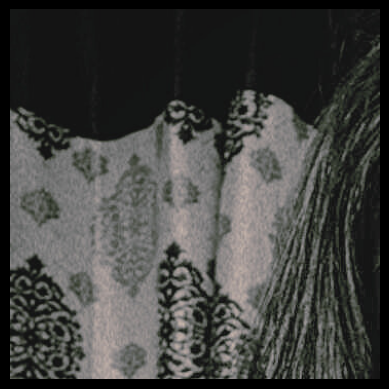

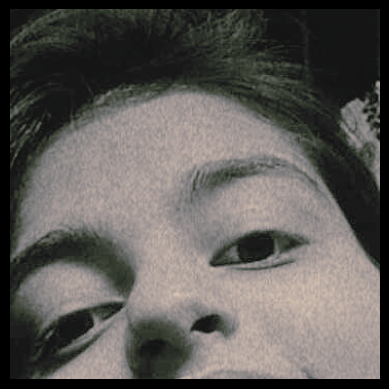

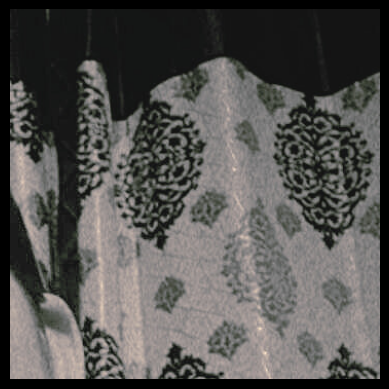

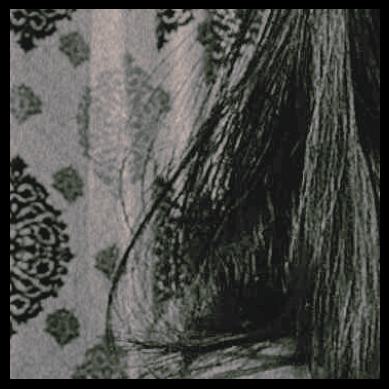

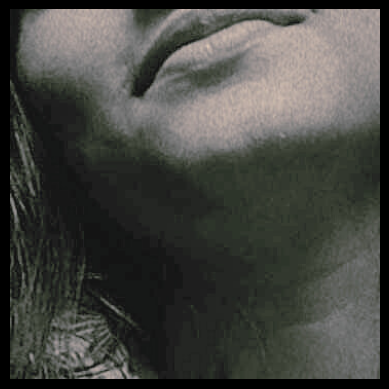

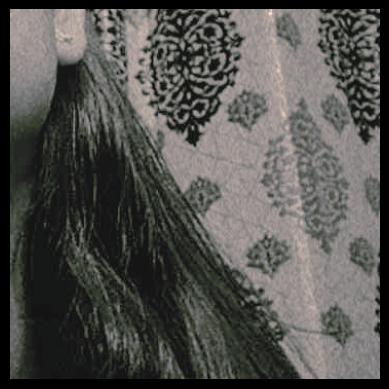

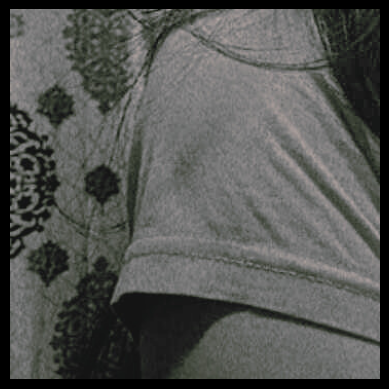

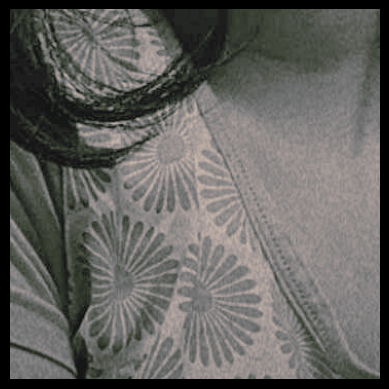

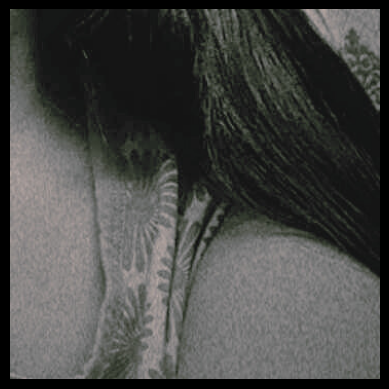

In [11]:
# Plot all slices seperately
allFiles = [f for f in os.listdir(DEST_DIR) if f.endswith('.png')]
for file in allFiles:
    slicePath = os.path.join(DEST_DIR, file)
    img = cv2.imread(slicePath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRGB)
    plt.axis("off")
    plt.show()
# end for

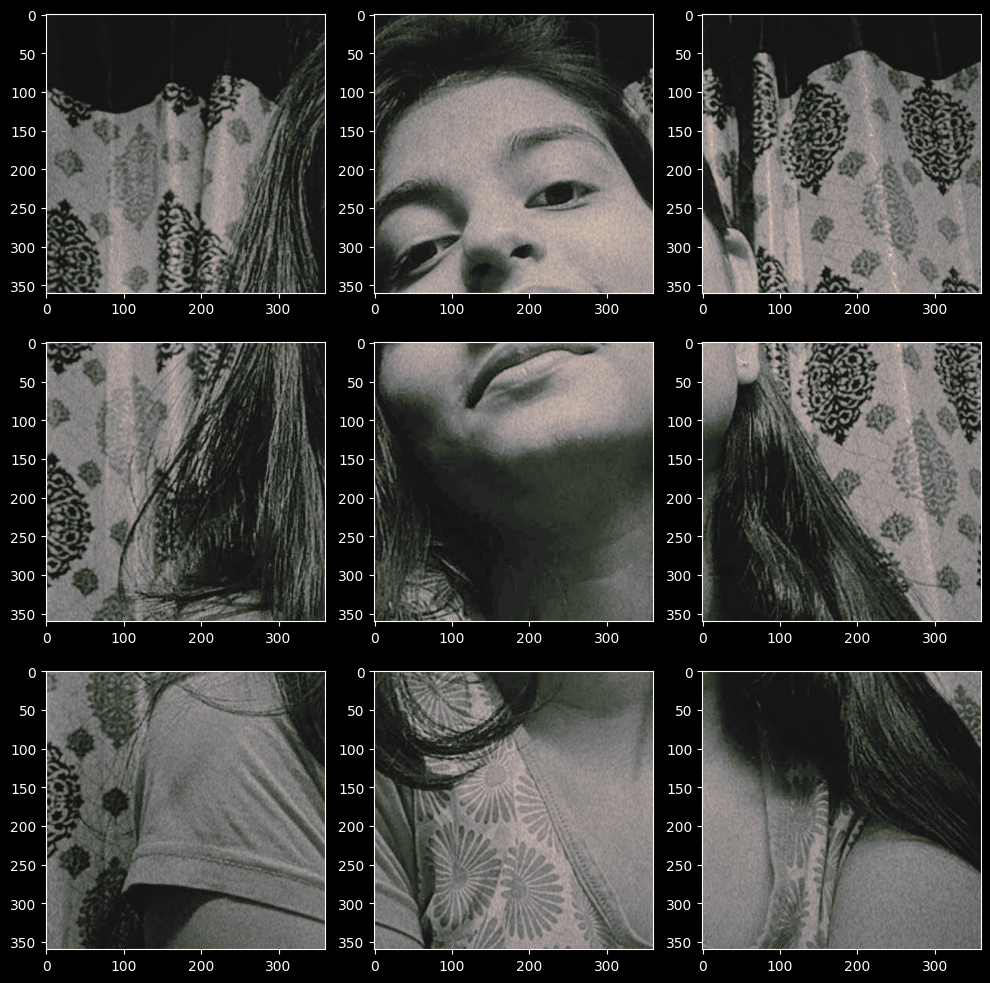

In [12]:
# Plot all slices in a grid
# Number of rows and columns
nRows = 3
nCols = 3
figSize = (10, 10)  # Adjust the size based on your preference

# Get all the files
allFiles = [f for f in os.listdir(DEST_DIR) if f.endswith('.png')]

# Create a figure and axes
fig, axes = plt.subplots(nRows, nCols, figsize=figSize)

for i, file in enumerate(allFiles):
    row = i // nCols
    col = i % nCols

    slicePath = os.path.join(DEST_DIR, file)
    img = cv2.imread(slicePath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[row, col].imshow(imgRGB)
# end for

plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()

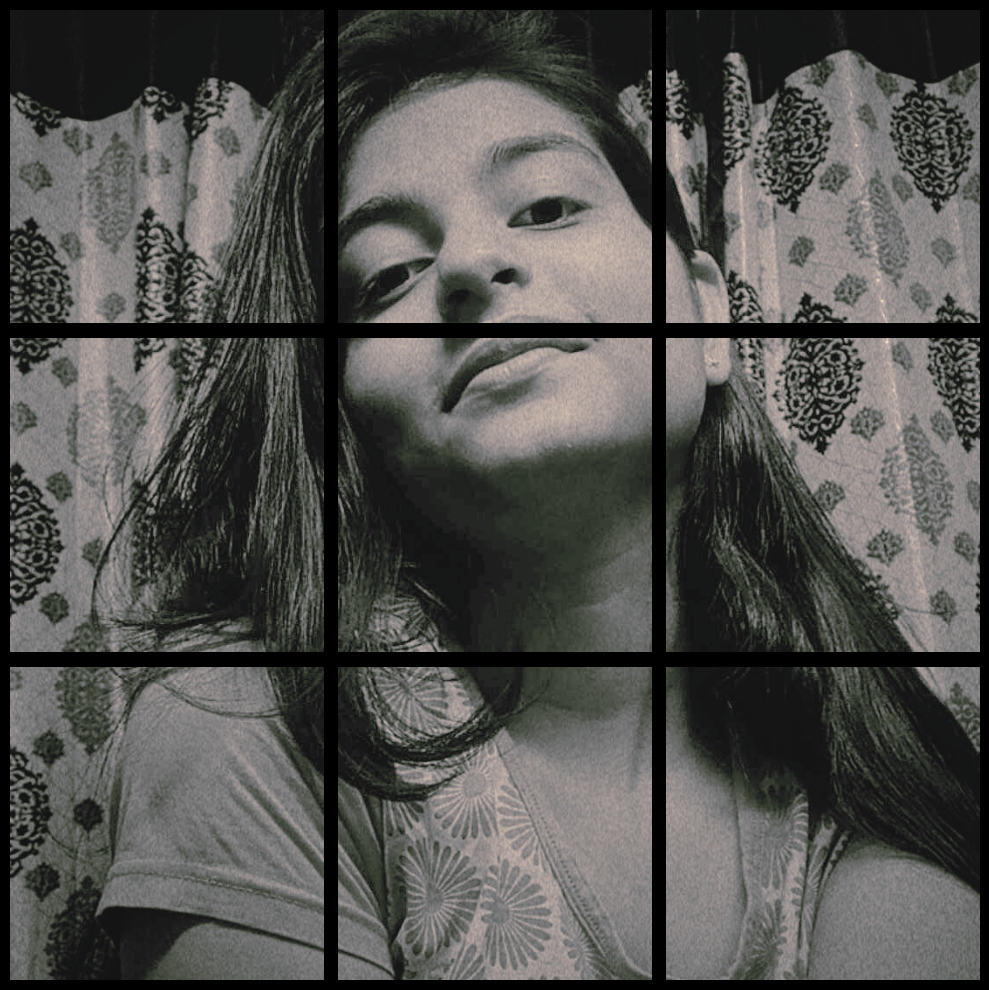

In [13]:
# Plot all slices in a grid
# Number of rows and columns
nRows = 3
nCols = 3
figSize = (10, 10)  # Adjust the size based on your preference

# Get all the files
allFiles = [f for f in os.listdir(DEST_DIR) if f.endswith('.png')]

# Create a figure and axes
fig, axes = plt.subplots(nRows, nCols, figsize=figSize)

for i, file in enumerate(allFiles):
    row = i // nCols
    col = i % nCols

    slicePath = os.path.join(DEST_DIR, file)
    img = cv2.imread(slicePath)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[row, col].imshow(imgRGB)
    axes[row, col].axis("off")
# end for

plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()

## Resize the Customised Blank "Move Me" Tile Image

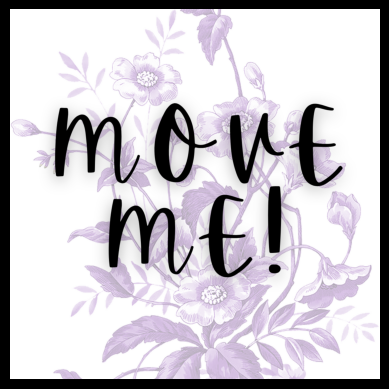

In [15]:
imgPath2 = os.path.join(SRC_DIR, "Slidder_Puzzle_Move_Me_Tile.png")

img2 = cv2.imread(imgPath2)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2RGB)
plt.axis("off")
plt.show()

In [17]:
img2RGB

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [18]:
img2RGB.shape

(1080, 1080, 3)

In [16]:
def resizeImage(imgPath, destPath, targetSize=(360, 360)):
    """
    Resize the image from the imgPath with the targetSize and save it in
    the destPath
    """
    img = cv2.imread(imgPath)

    # Resize the image with the target size
    resizedImg = cv2.resize(img, targetSize)

    # Save the resized image in destination path
    cv2.imwrite(destPath, resizedImg)

    return
# end function resizeImage()

In [19]:
# Function call to resize
destPath2 = os.path.join(DEST_DIR, "slice_moveme.png")
resizeImage(imgPath2, destPath2)

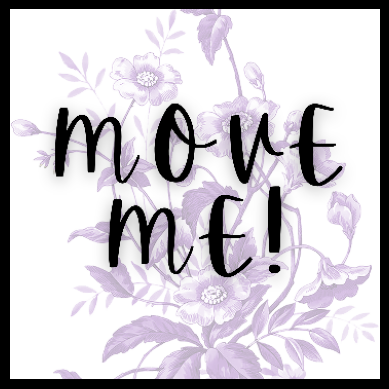

In [20]:
img2 = cv2.imread(destPath2)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2RGB)
plt.axis("off")
plt.show()

In [21]:
img2

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [22]:
img2.shape

(360, 360, 3)

In [6]:
# Calculate the frequency of each letter in a string
def calculateFrequency(string):
    """
    Return a dictionary with the frequency of each letter in the string
    """
    freq = {}
    for letter in string:
        if letter in freq:
            freq[letter] += 1
        else:
            freq[letter] = 1
        # end if
    # end for
    return freq
# end function calculateFrequency()

print(calculateFrequency("BRAHMAKAMAL"))
print(calculateFrequency("KHAMOSHIYAN"))
print(calculateFrequency("BHAPP"))
print(calculateFrequency("WAHEED"))
print(calculateFrequency("LOLO"))
print(calculateFrequency("MICE"))
print(calculateFrequency("SPHYGMOMANOMETER"))
print(calculateFrequency("RYANREYNOLDS"))
print(calculateFrequency("PURUSHOTTAM"))

{'B': 1, 'R': 1, 'A': 4, 'H': 1, 'M': 2, 'K': 1, 'L': 1}
{'K': 1, 'H': 2, 'A': 2, 'M': 1, 'O': 1, 'S': 1, 'I': 1, 'Y': 1, 'N': 1}
{'B': 1, 'H': 1, 'A': 1, 'P': 2}
{'W': 1, 'A': 1, 'H': 1, 'E': 2, 'D': 1}
{'L': 2, 'O': 2}
{'M': 1, 'I': 1, 'C': 1, 'E': 1}
{'S': 1, 'P': 1, 'H': 1, 'Y': 1, 'G': 1, 'M': 3, 'O': 2, 'A': 1, 'N': 1, 'E': 2, 'T': 1, 'R': 1}
{'R': 2, 'Y': 2, 'A': 1, 'N': 2, 'E': 1, 'O': 1, 'L': 1, 'D': 1, 'S': 1}
{'P': 1, 'U': 2, 'R': 1, 'S': 1, 'H': 1, 'O': 1, 'T': 2, 'A': 1, 'M': 1}


In [9]:
settt = set()
# Given a string, print the characters which appear more than once in the string
def printDuplicateCharacters(string):
    """
    Print the characters which appear more than once in the string
    """
    global settt

    freq = calculateFrequency(string)

    for letter in freq:
        if freq[letter] > 1:
            settt.add(letter)
            print(letter, end=" ")
        # end if
    # end for
    print()
    
    return
# end function printDuplicateCharacters()

printDuplicateCharacters("BRAHMAKAMAL")
printDuplicateCharacters("KHAMOSHIYAN")
printDuplicateCharacters("BHAPP")
printDuplicateCharacters("WAHEED")
printDuplicateCharacters("LOLO")
printDuplicateCharacters("MICE")
printDuplicateCharacters("SPHYGMOMANOMETER")
printDuplicateCharacters("RYANREYNOLDS")
printDuplicateCharacters("PURUSHOTTAM")
settt

A M 
H A 
P 
E 
L O 

M O E 
R Y N 
U T 


{'A', 'E', 'H', 'L', 'M', 'N', 'O', 'P', 'R', 'T', 'U', 'Y'}

In [11]:
len(settt)

12

In [16]:
lsttt = list(settt)
lsttt
lsttt = "".join(lsttt)
lsttt

'HURNATEYPLOM'

In [17]:
strng = "HURNATEYPLOM"
strng2 = "HURNATEYPLOMMM"
settt2 = set(strng)
lsttt3 = list(sorted(strng2))
lsttt3

['A', 'E', 'H', 'L', 'M', 'M', 'M', 'N', 'O', 'P', 'R', 'T', 'U', 'Y']

In [18]:
lsttt2 = list(sorted(strng))
lsttt2

['A', 'E', 'H', 'L', 'M', 'N', 'O', 'P', 'R', 'T', 'U', 'Y']

In [19]:
lsttt2 == lsttt3

False